In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from dt_apriltags import Detector

In [33]:
# img = cv2.imread('image.jpg')
# plt.imshow(img)

In [34]:
# cv2.line(img, (0, 0), (100, 100), (255, 0, 0), 5)
# plt.imshow(img)

In [35]:
# cv2.rectangle(img, (0, 0), (100, 100), (0, 255, 0), 5)
# plt.imshow(img)

In [36]:
# cv2.circle(img, (50, 50), 50, (0, 0, 255), 5)
# plt.imshow(img)

In [37]:
# pts = np.array([[10, 5], [20, 30], [70, 20], [50, 10]], np.int32)
# pts = pts.reshape((-1, 1, 2))
# cv2.polylines(img, [pts], True, (0, 255, 255), 5)
# plt.imshow(img)

In [38]:
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
# edges = cv2.Canny(gray, 50, 150, apertureSize=7) # detect edges
# lines = cv2.HoughLinesP(
#                 edges,
#                 1,
#                 np.pi/180,
#                 100,
#                 minLineLength=100,
#                 maxLineGap=10,
#         ) # detect lines

# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)

# plt.imshow(img)

In [39]:
# img = cv2.imread("pool2.jpg")
# gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
# edges = cv2.Canny(gray, 50, 200, apertureSize=7) # detect edges
# # plt.imshow(edges)
# lines = cv2.HoughLinesP(
#                 edges,
#                 1,
#                 np.pi/180,
#                 500,
#                 minLineLength=250,
#                 maxLineGap=5,
#         ) # detect lines

# for line in lines:
#     x1, y1, x2, y2 = line[0]
#     cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 7)

# plt.imshow(img)

In [40]:
"""
- Run the code above and make sure it works.
Done!
- What do the parameters of the Detector function do?
The parameters determine how the detector searches for april tags, including the number of threads to use and the
resolution to search by.
- What happens if you change the parameters?
It largely affects the time it takes to find the april tags, and the accuracy with which it can. 
- What are families?
families are the types of tags to look for.
- What does estimate_tag_pose do?
Not sure.
- What does camera_params do?
Adjusts the expected camera focal length and position.
- What does tag_size do?
The expected size of the tag in meters.
- The detect function returns a list of tags. What information does each tag contain?
Each tag has the tag family, the tag ID, the decision margin or confidence in location, and a description of the tag's geometry.
- Modify the code to give the position and orientation of each tag.

"""
"""
img = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)
at_detector = Detector(families='tag36h11',
                       nthreads=1,
                       quad_decimate=1.0,
                       quad_sigma=0.0,
                       refine_edges=1,
                       decode_sharpening=0.25,
                       debug=0)
tags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)
color_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
for tag in tags:
    print(tag.corners)
    for idx in range(len(tag.corners)):
        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))

    cv2.putText(color_img, str(tag.tag_id),
                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),
                fontFace=cv2.FONT_HERSHEY_SIMPLEX,
                fontScale=0.8,
                color=(0, 0, 255))
    
plt.imshow(color_img)
"""

"\nimg = cv2.imread('test_image.png', cv2.IMREAD_GRAYSCALE)\nat_detector = Detector(families='tag36h11',\n                       nthreads=1,\n                       quad_decimate=1.0,\n                       quad_sigma=0.0,\n                       refine_edges=1,\n                       decode_sharpening=0.25,\n                       debug=0)\ntags = at_detector.detect(img, estimate_tag_pose=False, camera_params=None, tag_size=None)\ncolor_img = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)\nfor tag in tags:\n    print(tag.corners)\n    for idx in range(len(tag.corners)):\n        cv2.line(color_img, tuple(tag.corners[idx - 1, :].astype(int)), tuple(tag.corners[idx, :].astype(int)), (0, 255, 0))\n\n    cv2.putText(color_img, str(tag.tag_id),\n                org=(tag.corners[0, 0].astype(int) + 10, tag.corners[0, 1].astype(int) + 10),\n                fontFace=cv2.FONT_HERSHEY_SIMPLEX,\n                fontScale=0.8,\n                color=(0, 0, 255))\n    \nplt.imshow(color_img)\n"

In [41]:
# vcap = cv2.VideoCapture("rtsp://10.29.17.108:8554/test")
# ret, frame = vcap.read()
# plt.savefig("rov_photo.png")
# plt.imshow(cv2.cvtColor(frame,cv2.COLOR_BGR2RGB))

In [42]:
img = cv2.imread("rov_pool.jpg")


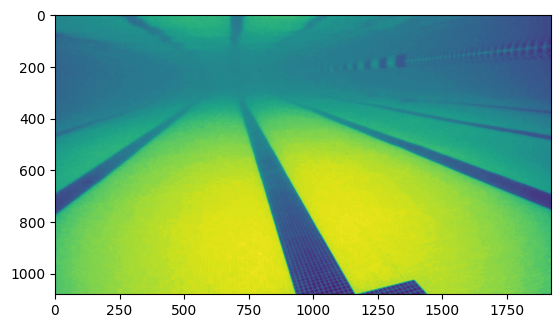

In [43]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
plt.imshow(gray)

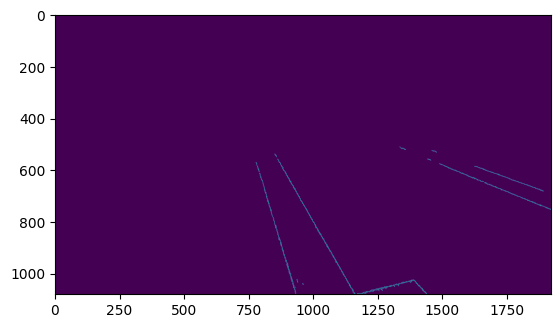

In [44]:
edges = cv2.Canny(gray, 100, 60, apertureSize=3) # detect edges
plt.imshow(edges)

In [45]:
import math
def get_slope(line) -> float:
    x1, y1, x2, y2 = line[0]
    denom = x2 - x1
    if denom == 0:
        return np.inf
    line_slope = (y2 - y1) / (x2 - x1)
    return line_slope

def filter_lines(lines: list) -> list:
    joined_lines = []
    for index, line in enumerate(lines[:-1]):
        if math.isclose(get_slope(line), get_slope(lines[index + 1]), rel_tol=0.1):
            joined_lines.append([[line[0][0], line[0][1], lines[index + 1][0][2], lines[index + 1][0][3]]])
            # print(f"Joined line: \n{line = }\n{lines[index + 1] = } became {joined_lines[index]}")
            # np.delete(joined_lines, joined_lines[index + 1])
        else:
            joined_lines.append(line)
    return joined_lines

def clean_lines(lines: list) -> list:
    line_data = []
    for line in lines:
        x1, y1, x2, y2 = line[0]
        #print(line[0])
        slope_x = x2 - x1
        if slope_x == 0:
            slope == 10000000
        slope = (y2 - y1)/slope_x
        if slope == 0:
            x_int = 10000000
        x_int = (slope * x1 - y1) / slope
        line_data.append([slope, x_int, x1, y1, x2, y2])
        #cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
    cleaned_lines = []
    for line in line_data:
        #loop thru cleaned_lines, see if line with close enough slope is already within cleaned_lines 
        can_add = True
        for cleaned_line in cleaned_lines:
            #if exists, set canAdd to false
            if abs(cleaned_line[1] - line[1]) < 0.5:
                can_add = False

        if can_add:
            cleaned_lines.append(line)
    return cleaned_lines

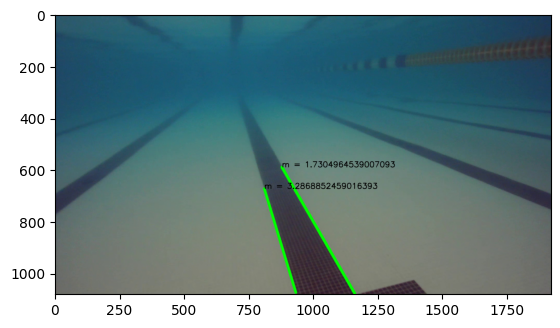

In [46]:
# plt.imshow(edges)
lines = cv2.HoughLinesP(
                edges,
                1,
                np.pi/180,
                100,
                minLineLength=100,
                maxLineGap=30,
        ) # detect lines

num_iterations = 10
for i in range(num_iterations):
    lines = filter_lines(lines)
# lines = clean_lines(lines)

for line in lines:
    # (x1, y1, x2, y2) = (line[2], line[3], line[4], line[5])
    x1, y1, x2, y2 = line[0]
    cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 10)
    # line_slope = line[0]
    line_slope = get_slope(line)
    cv2.putText(img, f"m = {line_slope}", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [47]:
def detect_lanes(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # convert to grayscale
    edges = cv2.Canny(gray, 100, 60, apertureSize=3) # detect edges
    lines = cv2.HoughLinesP(
                    edges,
                    1,
                    np.pi/180,
                    100,
                    minLineLength=100,
                    maxLineGap=30,
            ) # detect lines

    while len(lines) > 6:
        lines = filter_lines(lines)

    for line in lines:
        # (x1, y1, x2, y2) = (line[2], line[3], line[4], line[5])
        x1, y1, x2, y2 = line[0]
        cv2.line(img, (x1, y1), (x2, y2), (0, 255, 0), 10)
        # line_slope = line[0]
        line_slope = get_slope(line)
        cv2.putText(img, f"m = {line_slope}", (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 1, (0,0,0), 2)

    return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


In [48]:
cap = cv2.VideoCapture('AUV_Vid.mkv')
fourcc = cv2.VideoWriter_fourcc(*'XVID')
out = cv2.VideoWriter('output.avi', fourcc, 20.0, (640, 480))

# plt.imshow(detect_lanes(cv2.imread("rov_pool.jpg")))
# ret, frame = cap.read()
# plt.imshow(detect_lanes(frame))
while cap.isOpened():
    ret, frame = cap.read()
    plt.imshow(frame)
    out.write(detect_lanes(frame))
    plt.imshow(detect_lanes(frame))

KeyboardInterrupt: 